- [Heart Disease Dataset - Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [25]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
from matplotlib import pyplot as plt

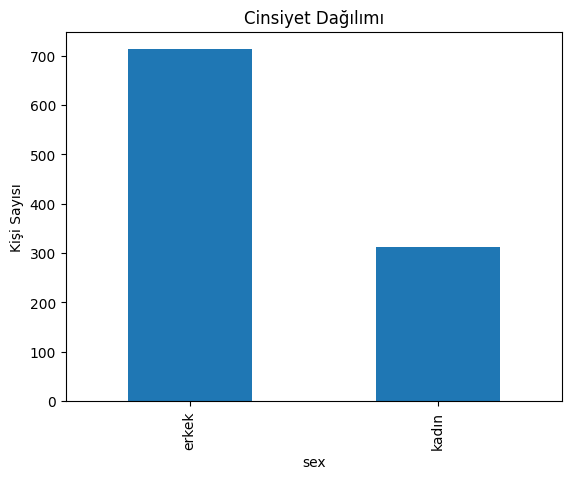

In [33]:
data1 = data['sex'].map({0:'kadın',1:'erkek'})
data1.value_counts().plot(kind='bar')
plt.title('Cinsiyet Dağılımı')
#plt.xlabel('Cinsiyet (0 = Kadın, 1 = Erkek)')

plt.ylabel('Kişi Sayısı')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

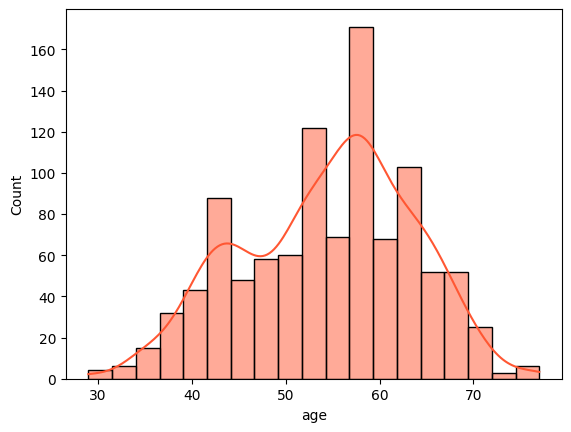

In [37]:
import seaborn as sns


sns.histplot(data['age'], kde=True, color="#FF5733")

In [38]:
data['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

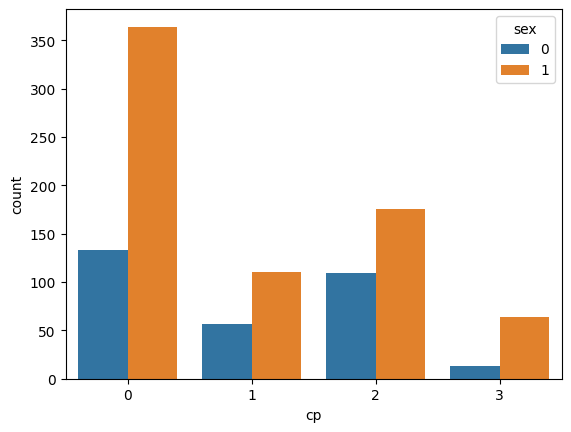

In [39]:
sns.countplot(data, x='cp', hue= 'sex')


In [64]:
#decision tree 

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler



In [65]:
X = data.drop('target',axis=1)
y = data['target']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, random_state = 42, test_size = 0.2)

**Decision Tree**

In [67]:
dt_clsf = DecisionTreeClassifier() #herhangi bir parametre ayarı yapmıyorum

dt_clsf.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred = dt_clsf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9853658536585366

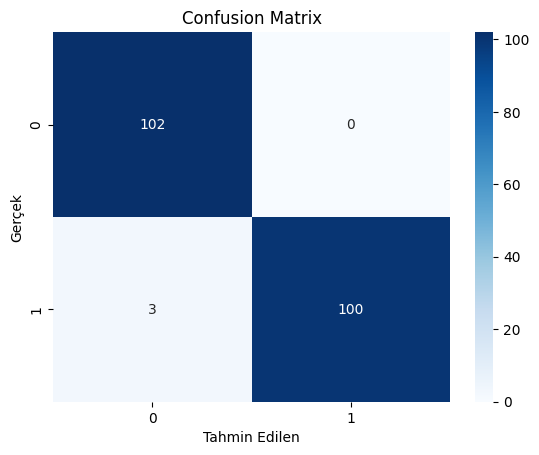

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()


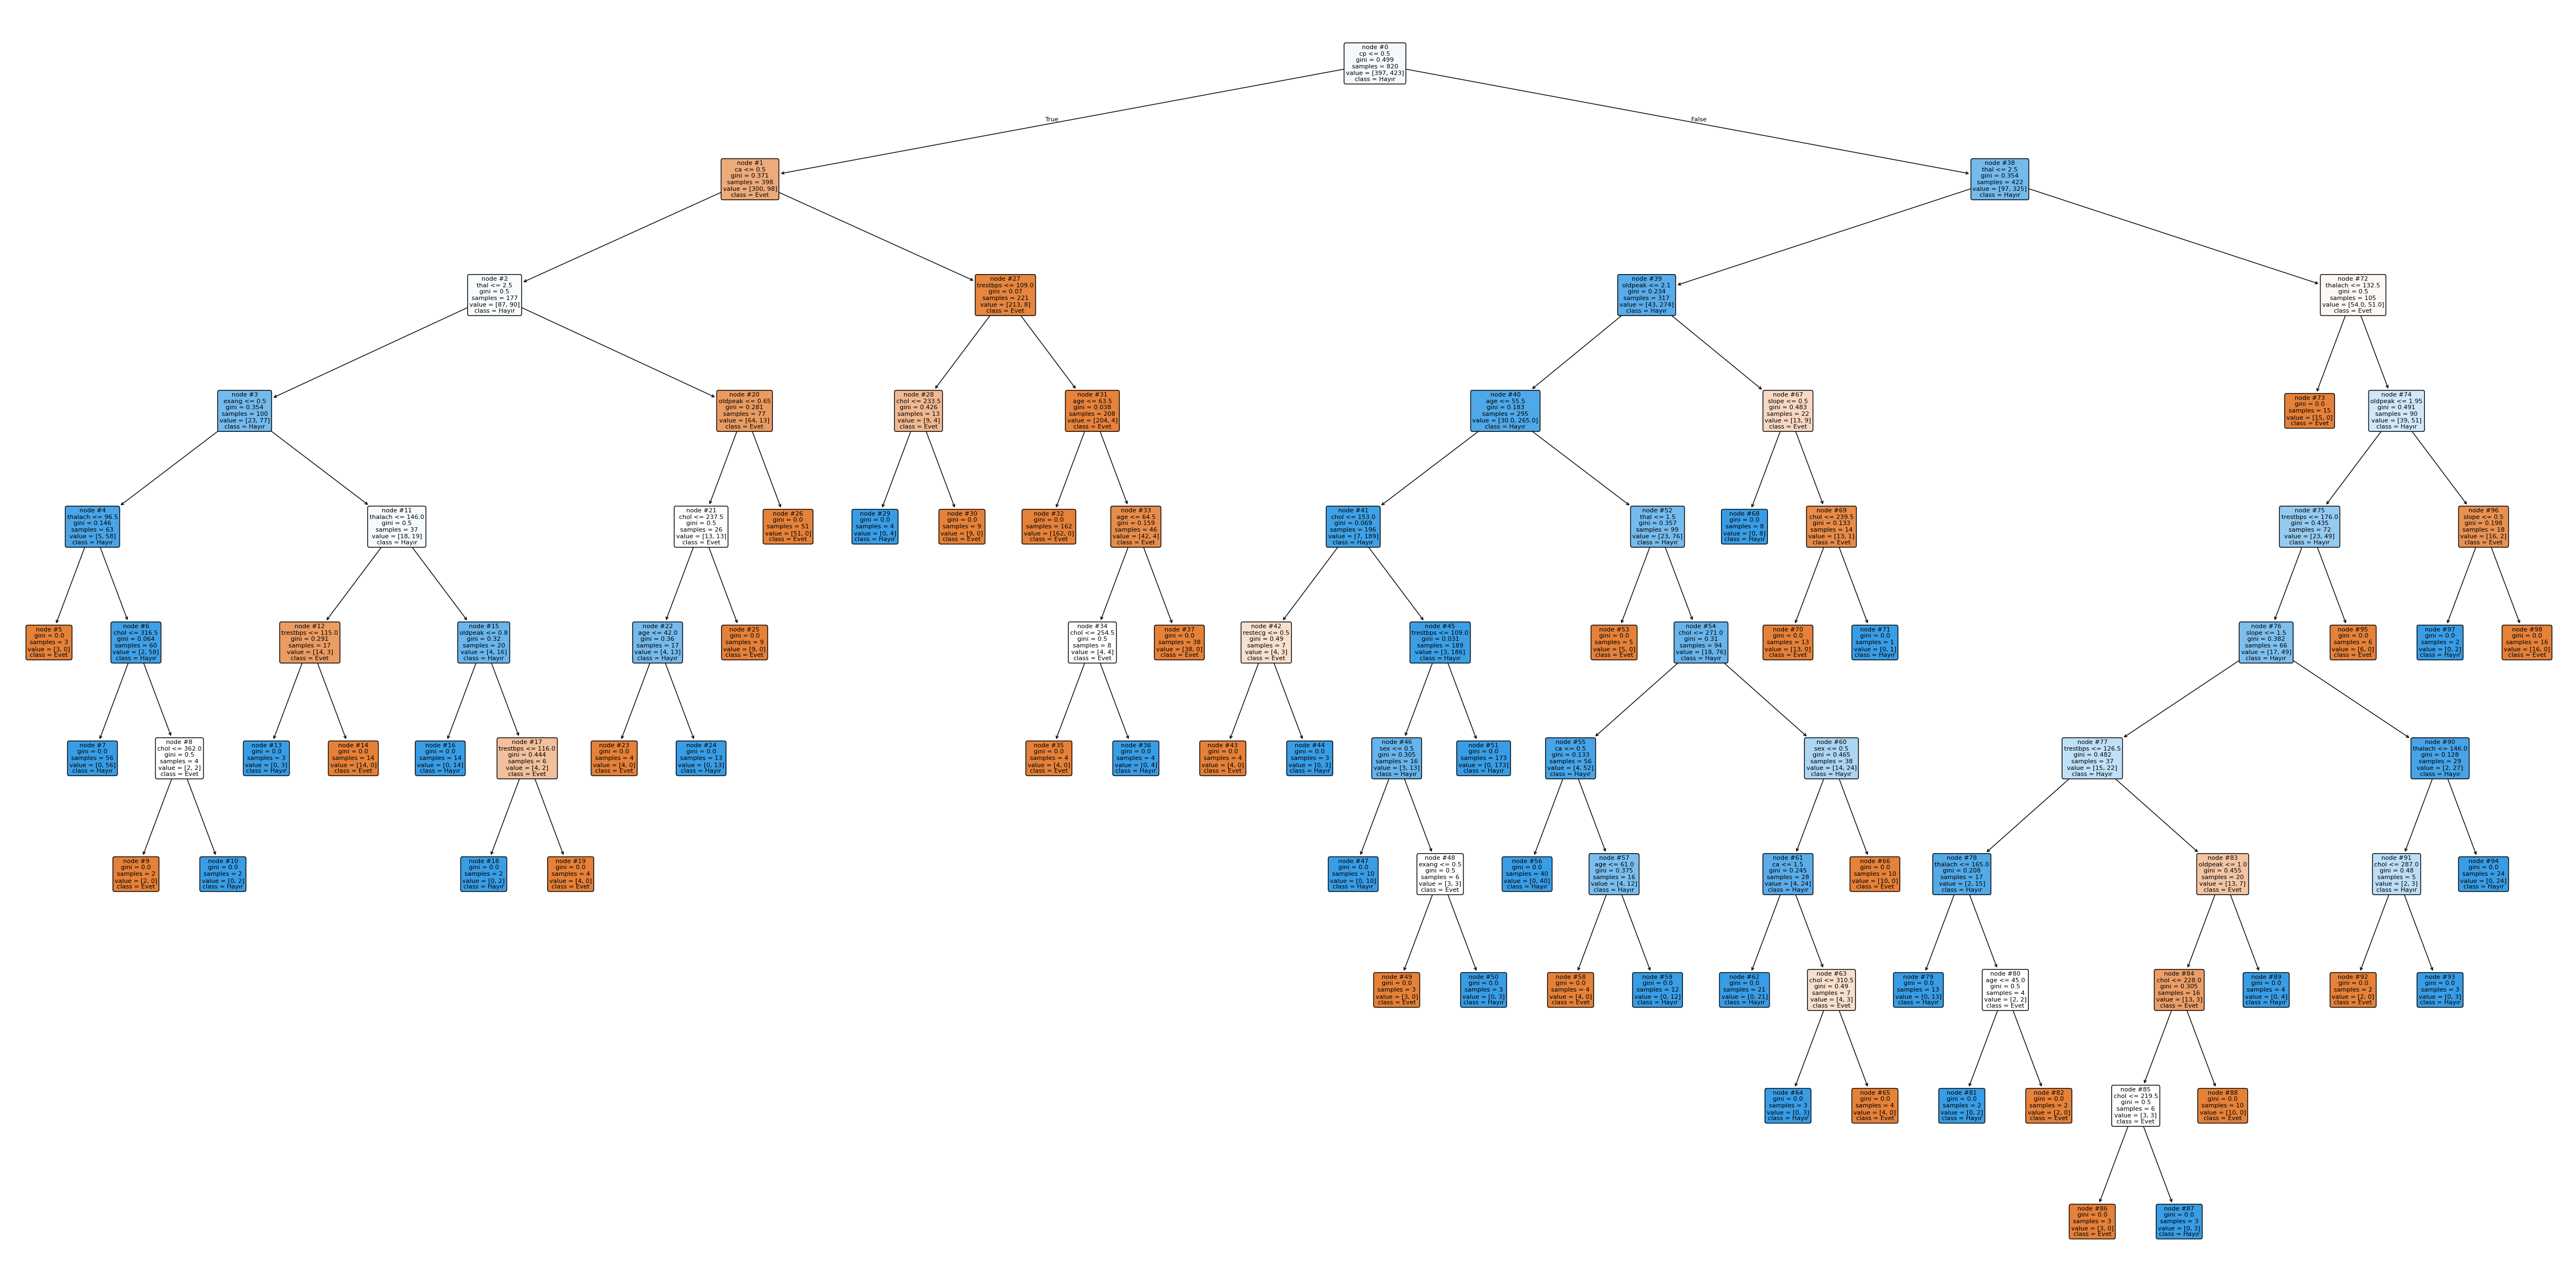

In [ ]:
plt.figure(figsize=(60,30))  # Daha geniş bir figür
plot_tree(
    dt_clsf,
    feature_names=X_train.columns,
    class_names=['Evet', 'Hayır'],
    filled=True,
    rounded=True,
    fontsize=8,        
    node_ids=True, 
)
plt.show()



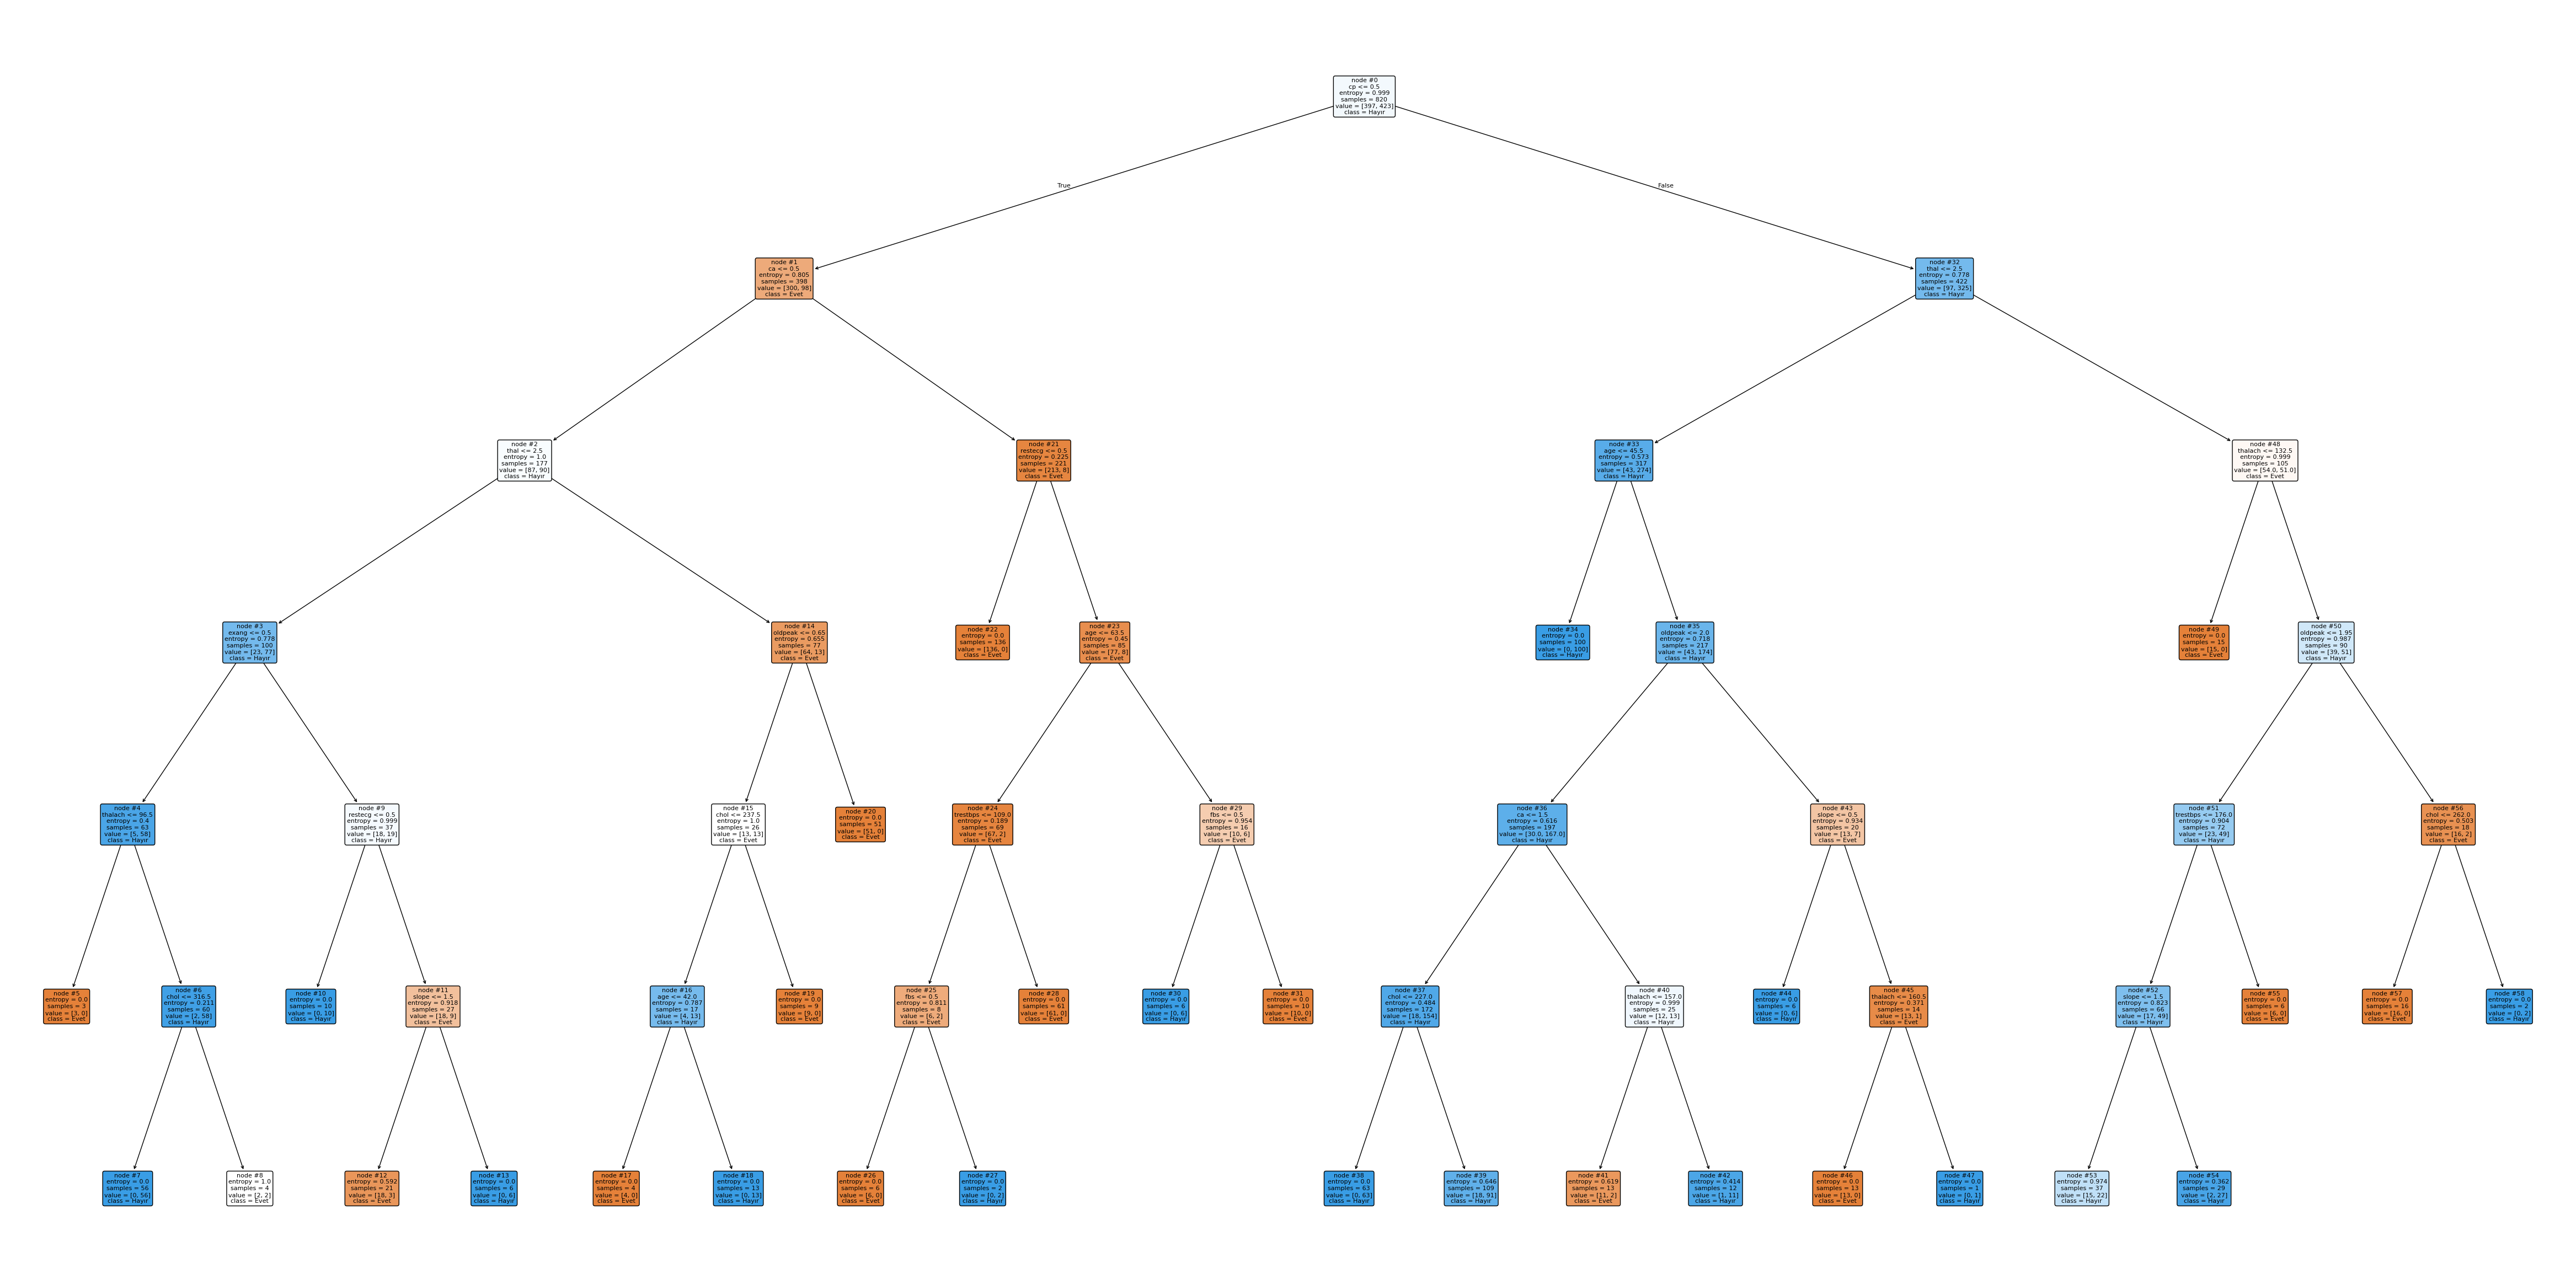

In [ ]:
#agacı daha anlasılır olması için derinlik ayarı yapıyorum.

dt_clsf = DecisionTreeClassifier(criterion = 'entropy' ,max_depth = 6) 
dt_clsf.fit(X_train, y_train)
y_pred = dt_clsf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy
plt.figure(figsize=(60,30))  
plot_tree(
    dt_clsf,
    feature_names=X_train.columns,
    class_names=['Evet', 'Hayır'],
    filled=True,
    rounded=True,
    fontsize=8,        
    node_ids=True, 
)
plt.show()



In [57]:
##standard scalar kullanma


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
dt_cslf_scaled = DecisionTreeClassifier()

In [92]:
dt_cslf_scaled.fit(X_test_scaled,y_test)
y_pred_scaled = dt_cslf_scaled.predict(X_test_scaled)

In [93]:
accuracy_scale = accuracy_score(y_test, y_pred_scaled)
accuracy_scale

1.0

In [89]:
dt_cslf_scaled = DecisionTreeClassifier(criterion='entropy', max_depth = 6)
dt_cslf_scaled.fit(X_test_scaled,y_test)

y_pred_scaled = dt_cslf_scaled.predict(X_test_scaled)
accuracy_scale = accuracy_score(y_test,y_pred_scaled)
accuracy_scale

0.9317073170731708

**RANDOM FOREST CLASSIFIER**

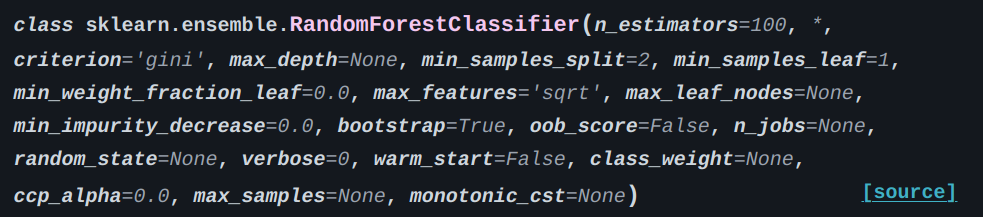

In [177]:
random_clsf = RandomForestClassifier(n_estimators=100,max_depth=20)

In [178]:
random_clsf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [179]:
y_random_pred = random_clsf.predict(X_test)

In [180]:
accuracy_random = accuracy_score(y_test, y_random_pred)
accuracy_random

0.9853658536585366

In [174]:
random_clsf = RandomForestClassifier(criterion ='log_loss' ,n_estimators=2)
random_clsf.fit(X_train,y_train)
y_random_pred = random_clsf.predict(X_test)
accuracy_random = accuracy_score(y_test, y_random_pred)
accuracy_random

0.9560975609756097

In [186]:
#scale edilmiş veri ile
random_clsf_scaled = RandomForestClassifier(n_estimators=200,max_depth=100)
random_clsf_scaled.fit(X_train_scaled,y_train)
y_random_pred_scaled = random_clsf.predict(X_test_scaled)
accuracy_random_scaled = accuracy_score(y_test, y_random_pred_scaled)
accuracy_random_scaled


###scale edilmiş veride performans düşüklüğü yaşandı

/home/yusuf/.pyenv/versions/3.12.2/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7853658536585366